<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Import-Libaries" data-toc-modified-id="Import-Libaries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Libaries</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Target-names" data-toc-modified-id="Target-names-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Target names</a></span></li><li><span><a href="#Feature-names" data-toc-modified-id="Feature-names-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Feature names</a></span></li><li><span><a href="#Traget-shape" data-toc-modified-id="Traget-shape-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Traget shape</a></span></li></ul></li><li><span><a href="#Training-and-Test-Data" data-toc-modified-id="Training-and-Test-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training and Test Data</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Pair-Plot" data-toc-modified-id="Pair-Plot-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Pair Plot</a></span></li></ul></li><li><span><a href="#k-Nearest-Neighbors-Model" data-toc-modified-id="k-Nearest-Neighbors-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>k-Nearest Neighbors Model</a></span><ul class="toc-item"><li><span><a href="#Fit-Model" data-toc-modified-id="Fit-Model-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Fit Model</a></span></li><li><span><a href="#Model-Predictions" data-toc-modified-id="Model-Predictions-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Model Predictions</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Test-Score-(test-set-accuracy)" data-toc-modified-id="Test-Score-(test-set-accuracy)-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Test Score (test set accuracy)</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Goal
Build a machine learning model that can learn from the measurements
of these irises whose species is known, so that we can predict the species for a new
iris.

# Import Libaries

In [14]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

from pandas.plotting import scatter_matrix

Python version: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.1.3
matplotlib version: 3.3.2
NumPy version: 1.19.2
SciPy version: 1.5.2
IPython version: 7.19.0
scikit-learn version: 0.24.1


# Data

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [2]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


##  Target names

In [4]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


## Feature names

In [5]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Traget shape

In [6]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [7]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Training and Test Data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)

In [9]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [10]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


# Data Exploration

## Pair Plot

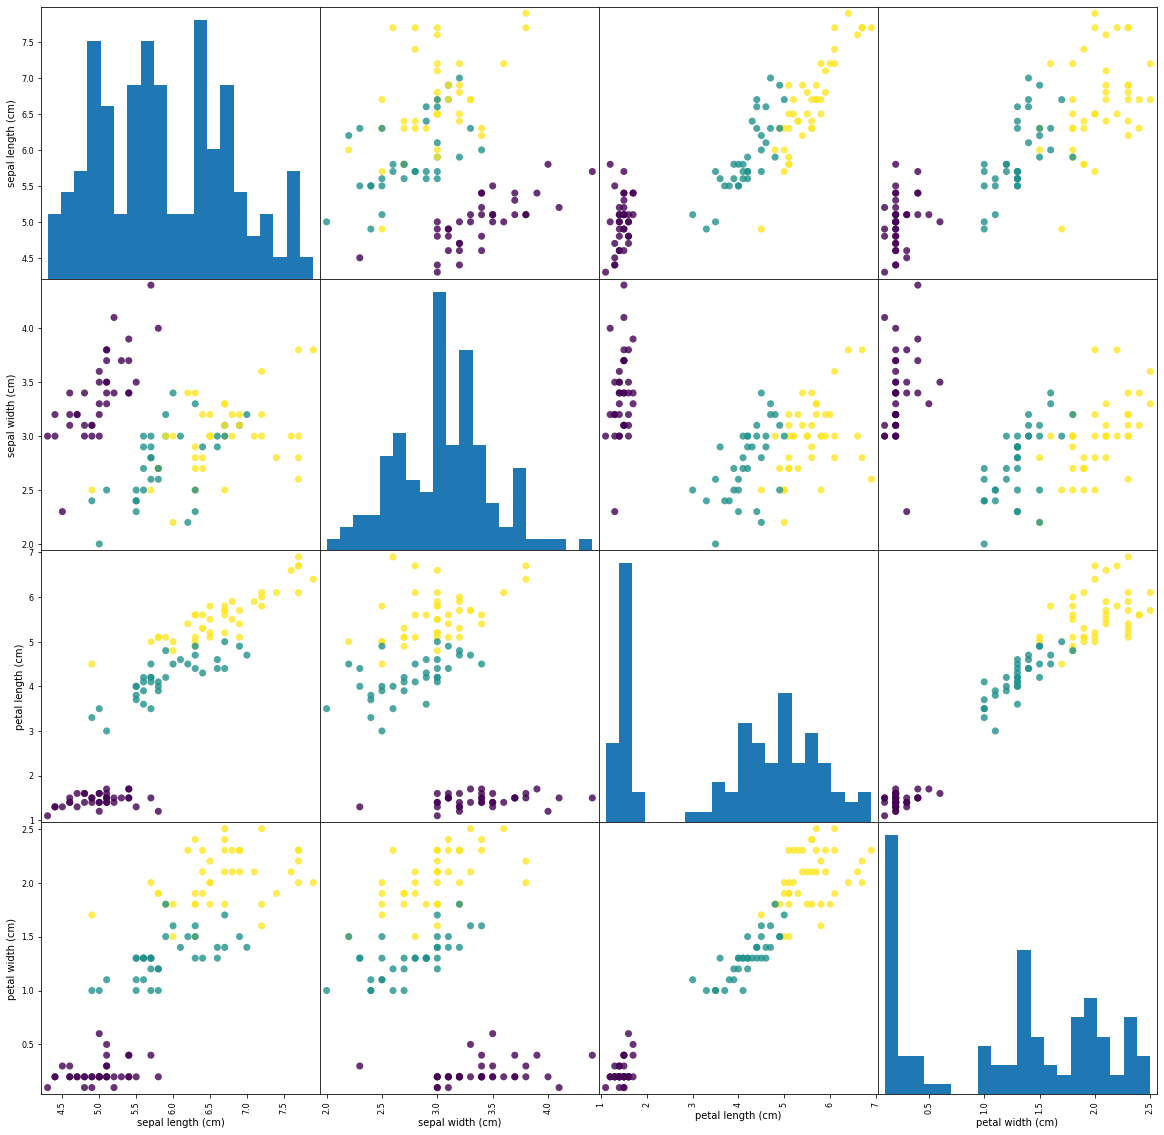

In [18]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
grr = scatter_matrix(iris_dataframe, c=y_train, figsize=(20, 20), marker='o',
hist_kwds={'bins': 20}, s=50, alpha=.8)

# k-Nearest Neighbors Model

The k in k-nearest neighbors signifies that instead of using only the closest neighbor to the new data point, we can consider any fixed number k of neighbors in the training (for example, the closest three or five neighbors). Then, we can make a prediction using the majority class among these neighbors. 

All machine learning models in scikit-learn are implemented in their own classes, which are called Estimator classes. The k-nearest neighbors classification algorithm is implemented in the KNeighborsClassifier class in the neighbors module. Before we can use the model, we need to instantiate the class into an object. This is when we will set any parameters of the model. The most important parameter of KNeighborsClassifier is the number of neighbors, which we will set to 1.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

## Fit Model

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Model Predictions

We can now make predictions using this model on new data for which we might not know the correct labels. Imagine we found an iris in the wild with a sepal length of 4 cm, a sepal width of 1.9 cm, a petal length of 1 cm, and a petal width of 0.3 cm.
What species of iris would this be? We can put this data into a NumPy array, again by calculating the shape - that is, the number of samples (1) multiplied by the number of features (4)

In [21]:
X_new = np.array([[4, 1.9, 1, 0.3]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [22]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


## Model Evaluation

In [23]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


## Test Score (test set accuracy)

In [24]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [25]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


# Conclusion

We evaluated the model using the score method, which computes the
accuracy of the model. We applied the score method to the test set data and the test set labels and found that our model is about 97% accurate, meaning it is correct 97% of the time on the test set.

This gave us the confidence to apply the model to new data (in our example, new
flower measurements) and trust that the model will be correct about 97% of the time.